# Merge datasets for detection

This script merges three datasets for training a hand detection model.
Before this script can be executed the remaining three notebooks in this folder shall be executed
to prepare the individual datasets for merging.
Some lines of code like paths have to be adjusted for your case. 
All needed adjustments are marked with "Todo".

In [2]:
import os
import cv2
from shutil import copyfile
import matplotlib.pyplot as plt
import random

import csv

In [11]:
# Todo: change path names to the preprocessed datasets
ROOT_DIR = "C:/datasets/ego_lared_tiny/" # path where the merged dataset will be saved

IMG_LARED = 'C:/datasets/lared/300x300/train_detection/' # path to LaRED dataset
LABEL_LARED = 'C:/datasets/lared/300x300/labels_train_detection.csv'

IMG_EGOHANDS = 'C:/datasets/egohands_data/images/' # path to EgoHands dataset
LABEL_EGOHANDS = 'C:/datasets/egohands_data/labels_all.csv'

IMG_TINY = 'C:/datasets/tinyhands/images300x300/' # path to TinyHands dataset
LABEL_TINY = 'C:/datasets/tinyhands/labels_all.csv'


### Helper Methods

In [17]:
def copy_images(src_dir, dst_dir):
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    file_names = [f for f in os.listdir(src_dir) if f.endswith('.jpg')]

    for file_name in file_names:
        src = src_dir + "/" + file_name
        dst = dst_dir + "/"  + file_name
        copyfile(src, dst)
    print("Files copied to", dst_dir)


def write_csv(filename, content):
    """creates an new .csv file and adds the the content provided to the file. 
    Parameters:
        filename (str): eg. filename.csv will create the csv file in the working directory.
        content ([str]): list of strings to be added to csv, eg. [[line1], [line2]]
    """
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(content)
        
def append_csv(filename, content):
    """Ads the the content provided to the file. File has to exist already.
    Parameters:
        filename (str): eg. filename.csv
        content ([str]): list of strings to be added to csv, eg. [[line1], [line2]]
    """

    with open(filename, 'a+', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(content)

def read_csv(filename):
    """ Reads an existing csv file.
    Parameters:
        list: all rows in a list
    """
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        return list(reader)
    

In [18]:
def merge_images_and_labels(root):

    csv_file_name = 'labels_all.csv'    
    csv_header = [['frame','xmin','xmax','ymin','ymax','class_id']]
    write_csv(ROOT_DIR + csv_file_name, csv_header)
    
    csv_lared = read_csv(LABEL_LARED)[1:] # read lebals without header
    csv_egohands = read_csv(LABEL_EGOHANDS)[1:]
    csv_tiny = read_csv(LABEL_TINY)[1:]

    append_csv(ROOT_DIR + csv_file_name, csv_lared)
    append_csv(ROOT_DIR + csv_file_name, csv_egohands)
    append_csv(ROOT_DIR + csv_file_name, csv_tiny)
    
    dst_dir = root + "images/"
    copy_images(IMG_LARED, dst_dir)
    copy_images(IMG_EGOHANDS, dst_dir)
    copy_images(IMG_TINY, dst_dir)


In [19]:
merge_images_and_labels(ROOT_DIR)

Files copied to C:/datasets/ego_lared_tiny/images/
Files copied to C:/datasets/ego_lared_tiny/images/
Files copied to C:/datasets/ego_lared_tiny/images/


In [20]:
def split_train_val():
    imgs = list(sorted(os.listdir(ROOT_DIR+"images")))

    val_imgs= imgs[0::5] # take every 5th picture for validation
    del imgs[0::5]
    train_imgs = imgs
    
    print("train imgs", len(train_imgs),"val imgs", len(val_imgs))
    
    train_labels, val_labels = [], []
    all_labels = read_csv(ROOT_DIR + '/labels_all.csv')
    header = all_labels[:1]
    print("Header", header)
    all_labels = all_labels[1:] # remove header
    
    
    for img_name in train_imgs: 
        records = [item for item in all_labels if item[0] == img_name]
        train_labels.extend(records)
        src = ROOT_DIR+"images/" + img_name
        dst = ROOT_DIR+"train/" + img_name
        copyfile(src, dst)
        
    for img_name in val_imgs: 
        records = [item for item in all_labels if item[0] == img_name]
        val_labels.extend(records)
        src = ROOT_DIR+"images/" + img_name
        dst = ROOT_DIR+"val/" + img_name
        copyfile(src, dst)

               
    print("Train imgs", len(train_imgs), "Train labels", len(train_labels))
    print("Val imgs ", len(val_imgs), "Val labels ", len(val_labels)) 

    write_csv(ROOT_DIR + 'labels_train.csv', header+train_labels)
    write_csv(ROOT_DIR + 'labels_val.csv', header+val_labels)

   
    print("Created", ROOT_DIR + 'labels_train.csv')
    print("Created", ROOT_DIR + 'labels_val.csv')



In [21]:
if not os.path.exists(ROOT_DIR + "train"):
    os.makedirs(ROOT_DIR + "train")
if not os.path.exists(ROOT_DIR + "val"):
    os.makedirs(ROOT_DIR + "val")
    
split_train_val()

train imgs 6681 val imgs 1671
Header [['frame', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id']]
Train imgs 6681 Train labels 10416
Val imgs  1671 Val labels  2604
Created C:/datasets/ego_lared_tiny/labels_train.csv
Created C:/datasets/ego_lared_tiny/labels_val.csv


In [22]:
def test_labels():
    csv_list = read_csv(ROOT_DIR + '/labels_train.csv')[1:] # read lebals without header
    index = random.randint(0, len(csv_list)-1)

    csv_record = csv_list[index]

    img_path = ROOT_DIR + "train/"+ csv_record[0]
    print(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    xmin, xmax, ymin, ymax = int(csv_record[1]), int(csv_record[2]), int(csv_record[3]), int(csv_record[4])

    rectangle = plt.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, facecolor='none', edgecolor="orange")
    plt.gca().add_patch(rectangle)
    plt.imshow(img)

C:/datasets/ego_lared_tiny/train/ana_mthumb upimg_CO_01_pulgar_arriba_0180_1_016_130.jpg


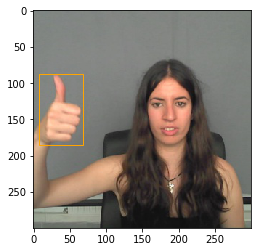

In [40]:
test_labels()